In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('C:/Users/wsand/Downloads/accidentes.xlsx')
df

,mes,dia,año,Cuenta de Fecha_Accidente,Fecha
0,1,1,2018,5,2018-01-01
1,1,2,2018,3,2018-01-02
2,1,3,2018,5,2018-01-03
3,1,4,2018,6,2018-01-04
4,1,5,2018,4,2018-01-05
...,...,...,...,...,...
2473,12,21,2024,3,2024-12-21
2474,12,22,2024,5,2024-12-22
2475,12,23,2024,7,2024-12-23
2476,12,24,2024,1,2024-12-24


In [7]:
df.drop(columns=['mes', "dia", "año"], inplace=True)

In [8]:
df

,Cuenta de Fecha_Accidente,Fecha
0,5,2018-01-01
1,3,2018-01-02
2,5,2018-01-03
3,6,2018-01-04
4,4,2018-01-05
...,...,...
2473,3,2024-12-21
2474,5,2024-12-22
2475,7,2024-12-23
2476,1,2024-12-24


In [9]:
df.set_index('Fecha', inplace=True)

In [10]:
df

,Cuenta de Fecha_Accidente
Fecha,
2018-01-01,5
2018-01-02,3
2018-01-03,5
2018-01-04,6
2018-01-05,4
...,...
2024-12-21,3
2024-12-22,5
2024-12-23,7


In [15]:
fecha_completa=pd.date_range(start='2018-01-01', end='2024-12-25', freq='D')
fecha_completa

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-21', '2024-12-22', '2024-12-23',
               '2024-12-24', '2024-12-25'],
              dtype='datetime64[ns]', length=2551, freq='D')

In [13]:
df_completo = df.reindex(fecha_completa, fill_value=0)


In [14]:
df_completo

,Cuenta de Fecha_Accidente
2018-01-01,5
2018-01-02,3
2018-01-03,5
2018-01-04,6
2018-01-05,4
...,...
2024-12-21,3
2024-12-22,5
2024-12-23,7
2024-12-24,1


In [16]:
df_completo.rename(columns={'Cuenta de Fecha_Accidente': 'Accidentes'}, inplace=True)

In [17]:
df_completo

,Accidentes
2018-01-01,5
2018-01-02,3
2018-01-03,5
2018-01-04,6
2018-01-05,4
...,...
2024-12-21,3
2024-12-22,5
2024-12-23,7
2024-12-24,1


<Axes: title={'center': 'Accidentes por día'}>

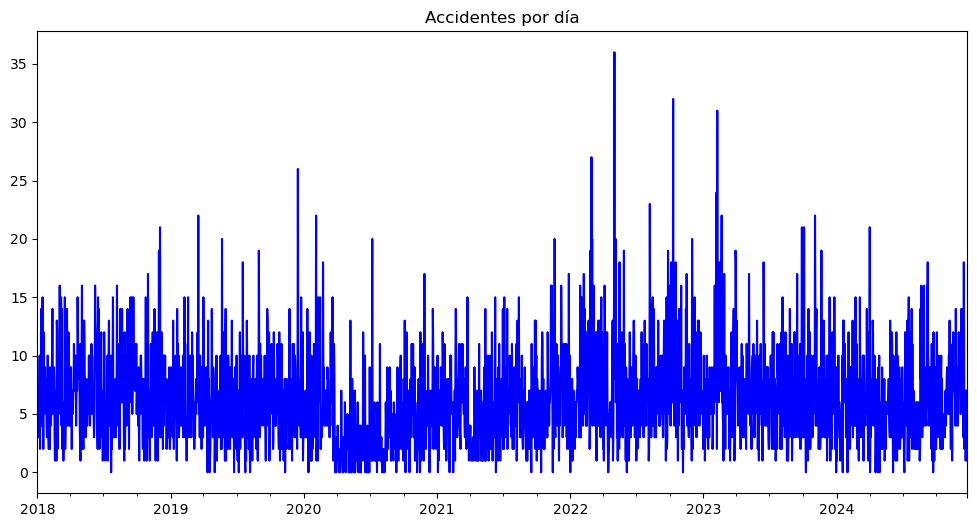

In [19]:
df_completo.plot(figsize=
                 (12, 6), title='Accidentes por día', color='blue', legend=False)

In [22]:
#%pip install pmdarim
import pmdarima as pm

In [24]:
modelo = pm.auto_arima(df_completo,  seasonal=True, m=7, 
                        d=1, D=1, start_p=0, start_q=0, max_p=4, max_q=4, 
                        start_P=0, start_Q=0, max_P=2, max_Q=2, 
                        information_criterion='bic', trace=True, 
                        error_action='ignore', suppress_warnings=False, stepwise=True)

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,1,0)[7]             : BIC=17537.080, Time=0.24 sec
 ARIMA(1,1,0)(1,1,0)[7]             : BIC=16076.961, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[7]             : BIC=inf, Time=3.40 sec
 ARIMA(1,1,0)(0,1,0)[7]             : BIC=16846.746, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[7]             : BIC=15760.331, Time=0.77 sec
 ARIMA(1,1,0)(2,1,1)[7]             : BIC=inf, Time=8.51 sec
 ARIMA(1,1,0)(1,1,1)[7]             : BIC=inf, Time=1.82 sec
 ARIMA(0,1,0)(2,1,0)[7]             : BIC=16448.276, Time=0.70 sec
 ARIMA(2,1,0)(2,1,0)[7]             : BIC=15501.706, Time=1.15 sec
 ARIMA(2,1,0)(1,1,0)[7]             : BIC=15810.425, Time=0.79 sec
 ARIMA(2,1,0)(2,1,1)[7]             : BIC=inf, Time=15.70 sec
 ARIMA(2,1,0)(1,1,1)[7]             : BIC=inf, Time=10.25 sec
 ARIMA(3,1,0)(2,1,0)[7]             : BIC=15360.691, Time=1.45 sec
 ARIMA(3,1,0)(1,1,0)[7]             : BIC=15665.701, Time=0.93 sec
 ARIMA(3,1,0)(2,1,1)[7]             : BIC=inf, 

In [25]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 2551
Model:             SARIMAX(4, 1, 0)x(2, 1, 0, 7)   Log Likelihood               -7599.252
Date:                          vie, 11 abr. 2025   AIC                          15212.503
Time:                                   23:33:50   BIC                          15253.391
Sample:                               01-01-2018   HQIC                         15227.334
                                    - 12-25-2024                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7694      0.018    -43.912      0.000      -0.804      -0.735
ar.L2         -0.5677      0.022    -26.202      0.000      -0.610      -0.525
ar.L3         -0.3895      0.022    -17.372      0.000      -0.433      -0.346
ar.L4         -0.2104      0.018    -11.445      0.000      -0.246      -0.174
ar.S.L7       -0.6798      0.016    -43.501      0.000      -0.710      -0.649
ar.S.L14      -0.3420      0.018    -19.527      0.000      -0.376      -0.308
sigma2        23.0310      0.525     43.849      0.000      22.002      24.060
===================================================================================
Ljung-Box (L1) (Q):                   2.41   Jarque-Bera (JB):               196.54
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             0.42
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
modelo.predict_in_sample()

2018-01-01     0.000000
2018-01-02     4.999936
2018-01-03     3.000042
2018-01-04     4.999955
2018-01-05     5.999968
                ...    
2024-12-21     2.780953
2024-12-22    10.973088
2024-12-23     3.383693
2024-12-24     3.419156
2024-12-25     1.805831
Freq: D, Name: predicted_mean, Length: 2551, dtype: float64

<Axes: title={'center': 'Accidentes por día'}>

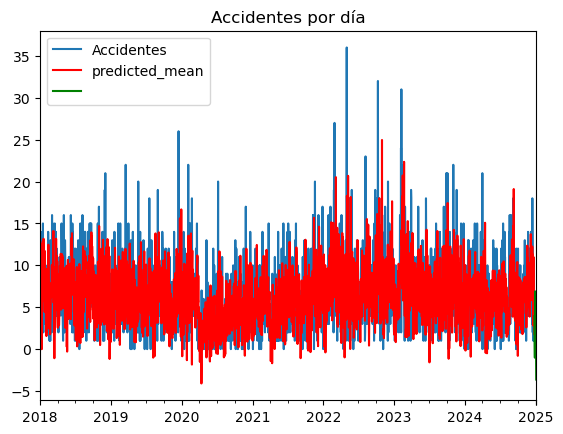

In [30]:
df_completo.plot()
modelo.predict_in_sample().plot(color='red', legend=True, title='Accidentes por día')
modelo.predict(steps=30).plot(color='green', legend=True, title='Accidentes por día')


<Axes: title={'center': 'Accidentes por día'}>

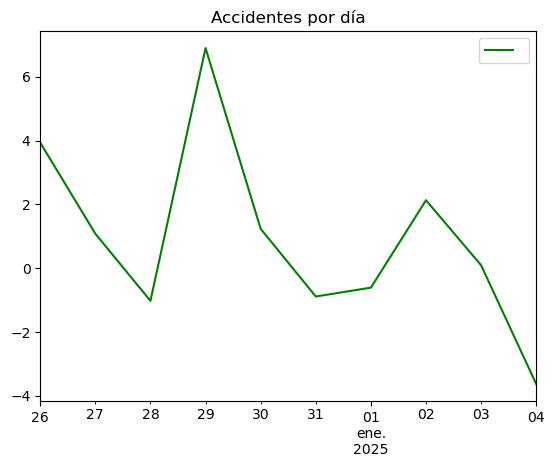

In [32]:
modelo.predict(steps=30).plot(color='green', legend=True, title='Accidentes por día')

In [ ]:
# Realizar predicciones dentro del periodo de entrenamiento
fitted_values = modelo.predict_in_sample()

# Crear una serie con los fitted values para que coincidan con el índice de la serie original
fitted_series = pd.Series(fitted_values, index=train_rec1.index)

# Realizar predicciones para el periodo de validación
forecast = modelo.predict(n_periods=len(validation_soi1), exogenous=validation_soi1)
forecast_index = pd.date_range(start="1986-10", end="1987-10", freq='ME')
forecast_series = pd.Series(forecast, index=forecast_index)

# Graficar los datos reales, el ajuste y el pronóstico
plt.figure(figsize=(14, 6))
plt.plot(rec1.index, rec1, label='Datos Originales', color='blue')
plt.plot(fitted_series.index, fitted_series, label='Ajuste del Modelo', color='green', linestyle='--')
plt.plot(forecast_series.index, forecast_series, label='Pronóstico', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Recruitment')
plt.title('Datos Reales, Ajuste del Modelo y Pronóstico con Pmdarima')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
import plotly.graph_objects as go
import pandas as pd

# --- Serie original ---
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_completo.index, y=df_completo.iloc[:, 0], 
    mode='lines', name='Accidentes observados', line=dict(color='blue')
))

# --- Pronóstico dentro de muestra ---
y_fitted = modelo.predict_in_sample()
fig.add_trace(go.Scatter(
    x=df_completo.index, y=y_fitted,
    mode='lines', name='Pronóstico dentro de muestra', line=dict(color='red', dash='dash')
))

# --- Pronóstico fuera de muestra (futuro) ---
n_steps = 30
y_forecast = modelo.predict(n_periods=n_steps)
last_date = df_completo.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_steps, freq='D')

fig.add_trace(go.Scatter(
    x=future_dates, y=y_forecast,
    mode='lines', name='Pronóstico fuera de muestra', line=dict(color='green', dash='dot')
))

# --- Configuración del gráfico ---
fig.update_layout(
    title='Accidentes por día',
    xaxis_title='Fecha',
    yaxis_title='Número de accidentes',
    template='plotly_white',
    legend=dict(x=0.01, y=0.99),
    hovermode='x unified'
)

fig.show()


In [ ]:
#%pip install workalendar

     ---------------------------------------- 0.0/5.8 MB ? eta -:--:--
     - -------------------------------------- 0.3/5.8 MB ? eta -:--:--
     ----- ---------------------------------- 0.8/5.8 MB 3.0 MB/s eta 0:00:02
     --------- ------------------------------ 1.3/5.8 MB 2.4 MB/s eta 0:00:02
     ------------ --------------------------- 1.8/5.8 MB 2.7 MB/s eta 0:00:02
     ---------------- ----------------------- 2.4/5.8 MB 2.5 MB/s eta 0:00:02
     -------------------- ------------------- 2.9/5.8 MB 2.5 MB/s eta 0:00:02
     ----------------------- ---------------- 3.4/5.8 MB 2.5 MB/s eta 0:00:01
     --------------------------- ------------ 3.9/5.8 MB 2.5 MB/s eta 0:00:01
     -------------------------------- ------- 4.7/5.8 MB 2.6 MB/s eta 0:00:01
     ------------------------------------ --- 5.2/5.8 MB 2.6 MB/s eta 0:00:01
     ---------------------------------------- 5.8/5.8 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): fini

In [48]:
import pandas as pd
import numpy as np
from workalendar.america import Colombia

# Crear índice de fechas
fechas = pd.date_range(start='2018-01-01', end='2024-12-25', freq='D')
df = pd.DataFrame(index=fechas)
df.index.name = 'fecha'

# Calendario de Colombia
cal = Colombia()

# Crear columnas exógenas
df['es_festivo'] = df.index.map(lambda x: int(cal.is_holiday(x)))
df['es_fin_de_semana'] = df.index.weekday.map(lambda x: int(x >= 5))  # 5 = sábado, 6 = domingo
df['dia_semana'] = df.index.weekday  # 0 = lunes, 6 = domingo
df['mes'] = df.index.month
df['es_viernes'] = df.index.weekday.map(lambda x: int(x == 4))

# Visualizar ejemplo
df


,es_festivo,es_fin_de_semana,dia_semana,mes,es_viernes
fecha,,,,,
2018-01-01,1,0,0,1,0
2018-01-02,0,0,1,1,0
2018-01-03,0,0,2,1,0
2018-01-04,0,0,3,1,0
2018-01-05,0,0,4,1,1
...,...,...,...,...,...
2024-12-21,0,1,5,12,0
2024-12-22,0,1,6,12,0
2024-12-23,0,0,0,12,0


In [49]:
# Supongamos que ya creaste el DataFrame de exógenas como 'df_exog'
# Y df_completo tiene el número de accidentes

# Asegúrate de que ambos índices estén en datetime y bien alineados
df_completo.index = pd.to_datetime(df_completo.index)
df.index = pd.to_datetime(df.index)

# Unir por índice (fecha)
df_modelo = df_completo.join(df, how='left')

# Confirmar estructura final
df_modelo


,Accidentes,es_festivo,es_fin_de_semana,dia_semana,mes,es_viernes
2018-01-01,5,1,0,0,1,0
2018-01-02,3,0,0,1,1,0
2018-01-03,5,0,0,2,1,0
2018-01-04,6,0,0,3,1,0
2018-01-05,4,0,0,4,1,1
...,...,...,...,...,...,...
2024-12-21,3,0,1,5,12,0
2024-12-22,5,0,1,6,12,0
2024-12-23,7,0,0,0,12,0
2024-12-24,1,0,0,1,12,0


In [50]:
y = df_modelo['Accidentes']
X = df_modelo.drop(['Accidentes'], axis=1)
  # deben tener las mismas fechas


In [51]:
import pmdarima as pm

modelo = pm.auto_arima(
    y,
    exogenous=X,
    seasonal=True,
    m=7,
    d=1, D=1,
    start_p=0, start_q=0, max_p=4, max_q=4,
    start_P=0, start_Q=0, max_P=2, max_Q=2,
    information_criterion='bic',
    trace=True,
    error_action='ignore',
    suppress_warnings=False,
    stepwise=True
)


Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,1,0)[7]             : BIC=17537.080, Time=0.10 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.

c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(1,1,0)(1,1,0)[7]             : BIC=16076.961, Time=0.35 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(0,1,1)(0,1,1)[7]             : BIC=inf, Time=3.50 sec
 ARIMA(1,1,0)(0,1,0)[7]             : BIC=16846.746, Time=0.11 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.

c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(1,1,0)(2,1,0)[7]             : BIC=15760.331, Time=0.69 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(1,1,0)(2,1,1)[7]             : BIC=inf, Time=7.53 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(1,1,0)(1,1,1)[7]             : BIC=inf, Time=1.69 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(0,1,0)(2,1,0)[7]             : BIC=16448.276, Time=0.66 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(2,1,0)(2,1,0)[7]             : BIC=15501.706, Time=1.05 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(2,1,0)(1,1,0)[7]             : BIC=15810.425, Time=0.82 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(2,1,0)(2,1,1)[7]             : BIC=inf, Time=12.97 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(2,1,0)(1,1,1)[7]             : BIC=inf, Time=10.22 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(3,1,0)(2,1,0)[7]             : BIC=15360.691, Time=1.38 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(3,1,0)(1,1,0)[7]             : BIC=15665.701, Time=0.90 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(3,1,0)(2,1,1)[7]             : BIC=inf, Time=18.63 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(3,1,0)(1,1,1)[7]             : BIC=inf, Time=11.44 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(4,1,0)(2,1,0)[7]             : BIC=15253.391, Time=1.70 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(4,1,0)(1,1,0)[7]             : BIC=15560.725, Time=1.13 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(4,1,0)(2,1,1)[7]             : BIC=inf, Time=16.53 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(4,1,0)(1,1,1)[7]             : BIC=inf, Time=12.58 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(4,1,1)(2,1,0)[7]             : BIC=inf, Time=18.10 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(3,1,1)(2,1,0)[7]             : BIC=inf, Time=14.69 sec


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: exogenous. After release 0.14, this will raise.



 ARIMA(4,1,0)(2,1,0)[7] intercept   : BIC=15261.221, Time=7.58 sec

Best model:  ARIMA(4,1,0)(2,1,0)[7]          
Total fit time: 144.368 seconds


In [52]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 2551
Model:             SARIMAX(4, 1, 0)x(2, 1, 0, 7)   Log Likelihood               -7599.252
Date:                          sáb, 12 abr. 2025   AIC                          15212.503
Time:                                   00:04:49   BIC                          15253.391
Sample:                               01-01-2018   HQIC                         15227.334
                                    - 12-25-2024                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7694      0.018    -43.912      0.000      -0.804      -0.735
ar.L2         -0.5677      0.022    -26.202      0.000      -0.610      -0.525
ar.L3         -0.3895      0.022    -17.372      0.000      -0.433      -0.346
ar.L4         -0.2104      0.018    -11.445      0.000      -0.246      -0.174
ar.S.L7       -0.6798      0.016    -43.501      0.000      -0.710      -0.649
ar.S.L14      -0.3420      0.018    -19.527      0.000      -0.376      -0.308
sigma2        23.0310      0.525     43.849      0.000      22.002      24.060
===================================================================================
Ljung-Box (L1) (Q):                   2.41   Jarque-Bera (JB):               196.54
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             0.42
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
X

,es_festivo,es_fin_de_semana,dia_semana,mes,es_viernes
2018-01-01,1,0,0,1,0
2018-01-02,0,0,1,1,0
2018-01-03,0,0,2,1,0
2018-01-04,0,0,3,1,0
2018-01-05,0,0,4,1,1
...,...,...,...,...,...
2024-12-21,0,1,5,12,0
2024-12-22,0,1,6,12,0
2024-12-23,0,0,0,12,0
2024-12-24,0,0,1,12,0


In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# y: tu serie de accidentes
# X: variables exógenas (df_exog)

modelo = SARIMAX(
    endog=y,
    exog=X,
    order=(4,1,0),
    seasonal_order=(2,1,0,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

resultado = modelo.fit(disp=False)
print(resultado.summary())

                                     SARIMAX Results                                     
Dep. Variable:                        Accidentes   No. Observations:                 2551
Model:             SARIMAX(4, 1, 0)x(2, 1, 0, 7)   Log Likelihood               -7545.776
Date:                          sáb, 12 abr. 2025   AIC                          15115.551
Time:                                   00:17:18   BIC                          15185.559
Sample:                               01-01-2018   HQIC                         15140.955
                                    - 12-25-2024                                         
Covariance Type:                             opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
es_festivo          -0.3083      0.343     -0.898      0.369      -0.981       0.365
es_fin_de_semana -8.995e-

Text(0.5, 1.0, 'title')

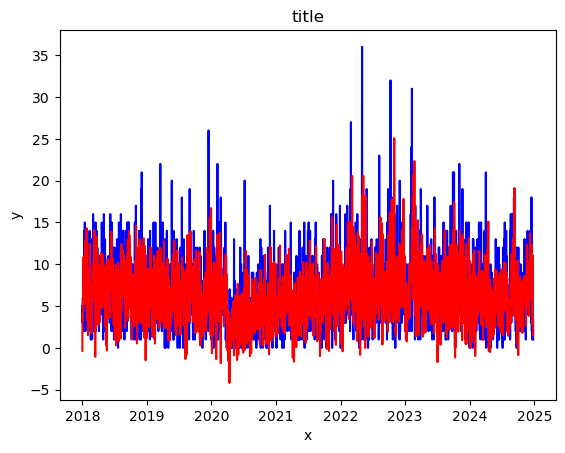

In [72]:
fig, ax = plt.subplots(1, 1)
ax.plot(df_modelo.index, df_modelo['Accidentes'], label='Accidentes', color='blue')
ax.plot(df_modelo.index, resultado.fittedvalues, label='Acc', color='red') 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')

In [73]:
import pandas as pd
import numpy as np
from workalendar.america import Colombia

# Crear índice de fechas
fechas = pd.date_range(start='2024-12-26', end='2025-01-24', freq='D')
df = pd.DataFrame(index=fechas)
df.index.name = 'fecha'

# Calendario de Colombia
cal = Colombia()

# Crear columnas exógenas
df['es_festivo'] = df.index.map(lambda x: int(cal.is_holiday(x)))
df['es_fin_de_semana'] = df.index.weekday.map(lambda x: int(x >= 5))  # 5 = sábado, 6 = domingo
df['dia_semana'] = df.index.weekday  # 0 = lunes, 6 = domingo
df['mes'] = df.index.month
df['es_viernes'] = df.index.weekday.map(lambda x: int(x == 4))

# Visualizar ejemplo
df

,es_festivo,es_fin_de_semana,dia_semana,mes,es_viernes
fecha,,,,,
2024-12-26,0,0,3,12,0
2024-12-27,0,0,4,12,1
2024-12-28,0,1,5,12,0
2024-12-29,0,1,6,12,0
2024-12-30,0,0,0,12,0
2024-12-31,0,0,1,12,0
2025-01-01,1,0,2,1,0
2025-01-02,0,0,3,1,0
2025-01-03,0,0,4,1,1


In [74]:
# Crear X_futuro con las exógenas correspondientes a las fechas futuras
pred = resultado.get_forecast(steps=30, exog=df)
predicciones = pred.predicted_mean
conf_int = pred.conf_int()


In [76]:
predicciones

2024-12-26    4.001418
2024-12-27    1.111253
2024-12-28   -0.931356
2024-12-29    7.096157
2024-12-30    1.355545
2024-12-31   -0.789716
2025-01-01   -0.207897
2025-01-02    2.781077
2025-01-03    0.744874
2025-01-04   -2.977008
2025-01-05    5.427912
2025-01-06    0.174648
2025-01-07   -3.932117
2025-01-08   -2.011911
2025-01-09   -0.240629
2025-01-10   -3.923821
2025-01-11   -5.116102
2025-01-12    0.962563
2025-01-13   -1.867285
2025-01-14   -6.061412
2025-01-15   -5.219082
2025-01-16   -2.825271
2025-01-17   -5.681890
2025-01-18   -8.017764
2025-01-19   -0.486708
2025-01-20   -5.027995
2025-01-21   -8.592917
2025-01-22   -7.552856
2025-01-23   -5.270062
2025-01-24   -8.123111
Freq: D, Name: predicted_mean, dtype: float64

<Axes: title={'center': 'Accidentes por día'}>

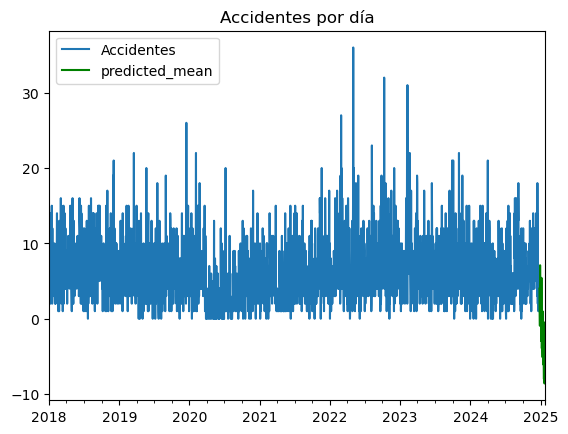

In [78]:
df_completo.plot()
#modelo.predict_in_sample().plot(color='red', legend=True, title='Accidentes por día')
predicciones.plot(color='green', legend=True, title='Accidentes por día')
